# Library Import

In [28]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
print('Train Image Shape : ',X_train.shape)
print('Train Label Shape : ',y_train.shape)
print('Test Image Shape  : ', X_test.shape)
print('Test Label Shaep  : ', y_test.shape)

Train Image Shape :  (60000, 28, 28)
Train Label Shape :  (60000,)
Test Image Shape  :  (10000, 28, 28)
Test Label Shaep  :  (10000,)


- Label : Class
- 0 : T-shirt/top
- 1 : Trouser
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5	: Sandal
- 6	: Shirt
- 7	: Sneaker
- 8	: Bag
- 9	: Ankle boot

# Data Visualization

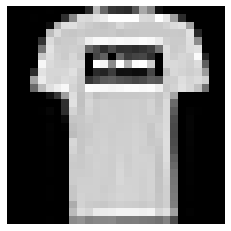

0


In [48]:
plt.imshow(X_train[1], 'gray')
plt.axis('off')
plt.show()

print(y_train[1])

# Data Scaling

In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# Model(Keras)

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5865 - accuracy: 0.7921
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8665
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3209 - accuracy: 0.8834
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.8924
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8962
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2638 - accuracy: 0.9005
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9058
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2440 - accuracy: 0.9091
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2257 - accuracy: 0.9161
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.222

In [23]:
train_acc = hist.history['accuracy'][-1]
train_loss = hist.history['loss'][-1]

In [24]:
print('Train Accuracy : ', train_acc)
print('Train Loss : ', train_loss)

Train Accuracy :  0.9410499930381775
Train Loss :  0.1583346128463745


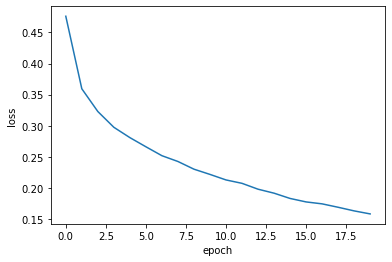

In [25]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 725us/step - loss: 0.3620 - accuracy: 0.8938


In [27]:
print('Test Accuracy : ', test_acc)
print('Test Loss : ', test_loss)

Test Accuracy :  0.8938000202178955
Test Loss :  0.36202484369277954


# Model L2

In [32]:
model_l2 = Sequential()
model_l2.add(Flatten(input_shape=(28, 28)))
model_l2.add(Dense(512, kernel_regularizer=regularizers.l2(0.0001) ,activation='relu'))
model_l2.add(Dense(10, activation='softmax'))

In [34]:
model_l2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_l2 = model_l2.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6515 - accuracy: 0.7893
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4411 - accuracy: 0.8586
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4090 - accuracy: 0.8687
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3856 - accuracy: 0.8789
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3649 - accuracy: 0.8867
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3506 - accuracy: 0.8898
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3469 - accuracy: 0.8931
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3330 - accuracy: 0.8965
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3292 - accuracy: 0.8981
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.32

In [35]:
train_acc_l2 = hist_l2.history['accuracy'][-1]
train_loss_l2 = hist_l2.history['loss'][-1]

In [36]:
print('Train Accuracy L2 : ', train_acc_l2)
print('Train Loss L2 : ', train_loss_l2)

Train Accuracy L2 :  0.9087499976158142
Train Loss L2 :  0.2995024025440216


In [38]:
test_loss_l2, test_acc_l2 = model_l2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8855


In [39]:
print('Test Accuracy L2 : ', test_acc_l2)
print('Test Loss L2 : ', test_loss_l2)

Test Accuracy L2 :  0.8855000138282776
Test Loss L2 :  0.38250991702079773


In [40]:
df = pd.DataFrame(data=[[train_acc, test_acc], [train_acc_l2, test_acc_l2]], 
                  index = ['Model', 'Model_with_L2'], 
                  columns=['Train accuracy', 'Test accuracy'])
df

,Train accuracy,Test accuracy
Model,0.94105,0.8938
Model_with_L2,0.90875,0.8855


# Prediction

In [42]:
pred = model.predict(X_test)

In [50]:
print(pred[2])

[2.7750119e-18 1.0000000e+00 1.3412407e-21 1.5465077e-18 6.5532884e-22
 8.4002188e-30 9.2402009e-16 0.0000000e+00 2.8043823e-26 0.0000000e+00]


In [51]:
print(np.argmax(pred[2]))

1


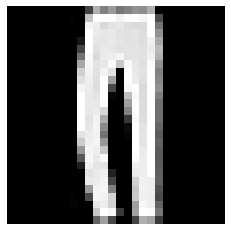

1


In [52]:
plt.imshow(X_test[2], 'gray')
plt.axis('off')
plt.show()

print(y_test[2])